## Determinantes de los ingresos con la ENAHO-INEI (en PROCESO)

Este trabajo servirá como un breve análisis de los determinantes de los ingresos familiares de las familias peruanos, en base a la ENAHO del 2019, previo a la pandemia. Se hará uso de la librería `sklearn` para la realización de las regresiones lineales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from zipfile import ZipFile
from urllib.request import urlretrieve

Se importará los zips de tres módulos de la ENAHO. El módulo 03 contiene información acerca de educación, el 05 contiene de empleo e ingresos y el módulo 34 es la sumaria

In [2]:
urlretrieve("http://iinei.inei.gob.pe/iinei/srienaho/descarga/STATA/687-Modulo03.zip", "./data/687-Modulo03.zip")
urlretrieve("http://iinei.inei.gob.pe/iinei/srienaho/descarga/STATA/687-Modulo05.zip", "./data/687-Modulo05.zip")
urlretrieve("http://iinei.inei.gob.pe/iinei/srienaho/descarga/STATA/687-Modulo34.zip", "./data/687-Modulo34.zip")

('./data/687-Modulo34.zip', <http.client.HTTPMessage at 0x1f83fc7d6d0>)

Se define las variables que se van a extraer de cada una de las bases de datos

In [3]:
var_empleo = {"ubigeo": "ubigeo", #Area urbana/rural
              "conglome": "conglome",
              "vivienda": "vivienda",
              "hogar": "hogar",
              "codperso": "codperso",
              "p501": "empleado",
              "p207": "sexo",
              "p208a": "edad", #Edad al cuadrado
              "ocu500": "pea_ocup",
              "ocupinf": "inform",
              "p209": "est_civil",
              "p512a": "tamaño_empr",
              "p513t": "horas_trab", #Total en todos los trabajos: p520
              "p514": "trab_secund",
              "p524a1": "ing"}

var_sumaria = {} #NSE

var_educa = {} #Años de educación, lengua materna

var_empleo_keys = list(var_empleo.keys())
var_empleo_name = list(var_empleo.values())

Se descomprime los zips, y se procede a convertirlo en un DataFrame llamado `dta`

In [4]:
with ZipFile("./data/687-Modulo05.zip") as z:
    with z.open("687-Modulo05/enaho01a-2019-500.dta") as file:
        dta = pd.read_stata(file, columns = var_empleo_keys)

dta.rename(var_empleo, axis = 1, inplace = True)

In [5]:
dta.head()

,ubigeo,conglome,vivienda,hogar,codperso,empleado,sexo,edad,pea_ocup,inform,est_civil,tamaño_empr,horas_trab,trab_secund,ing
0,010101,005001,007,11,01,si,mujer,50,ocupado,empleo informal,separado(a),hasta 20 personas,15.0,si,NaN
1,010101,005001,007,11,02,no,hombre,23,no pea,NaN,soltero(a),NaN,NaN,NaN,NaN
2,010101,005001,007,11,03,si,mujer,27,ocupado,empleo formal,separado(a),de 21 a 50 personas,84.0,no,900.0
3,010101,005001,017,11,01,no,mujer,65,no pea,NaN,separado(a),NaN,NaN,NaN,NaN
4,010101,005001,017,11,02,si,mujer,34,ocupado,empleo informal,separado(a),hasta 20 personas,72.0,no,600.0


### Data Wrangling

1. Limpieza

    1.1 Merge entre bases
    
    1.2 Creación/Corrección de variables: bins
    
    1.3 Arreglar missing values
    
    1.4 Arreglar distribución de los ingresos
    
    1.5 Etc.
    

In [6]:
dta["pea_ocup"].unique()

['ocupado', 'no pea', 'desocupado oculto', 'desocupado abierto', 0]
Categories (5, object): [0 < 'ocupado' < 'desocupado abierto' < 'desocupado oculto' < 'no pea']

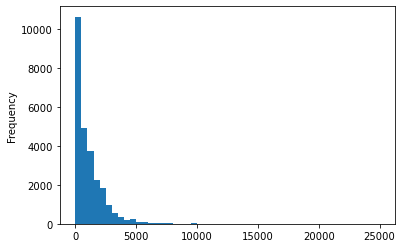

In [7]:
dta["ing"].plot(kind = "hist", bins = 50) #Necesario sacar logaritmo
plt.show()

In [8]:
dta["ln_ing"] = np.log(dta["ing"])

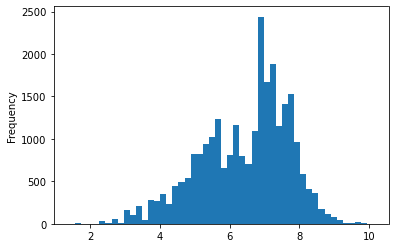

In [9]:
dta["ln_ing"].plot(kind = "hist", bins = 50)
plt.show()

### Data Visualization

2. Exploración de datos

    2.1 Scatter plot para analizar las relaciones lineales (subplots y con linea de tendencia) (relaciones no lineales?)
    
    2.2 Ver distribuciones con un histograma o con box plot
    
    2.3 Arreglar normalidad?
    
    2.4 Multicolinealidad: correlogramas para analizar

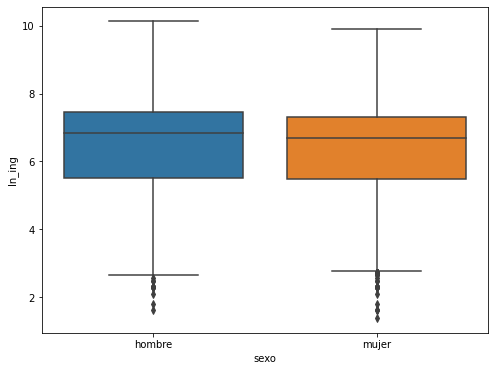

In [10]:
plt.figure(figsize=(8,6))

sns.boxplot(x="sexo", y="ln_ing", data=dta)
plt.show()

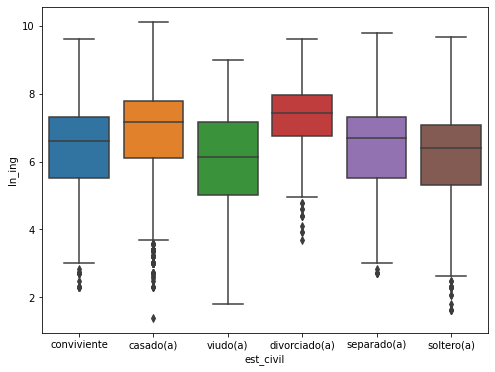

In [11]:
plt.figure(figsize=(8,6))

sns.boxplot(x="est_civil", y="ln_ing", data=dta)
plt.show()

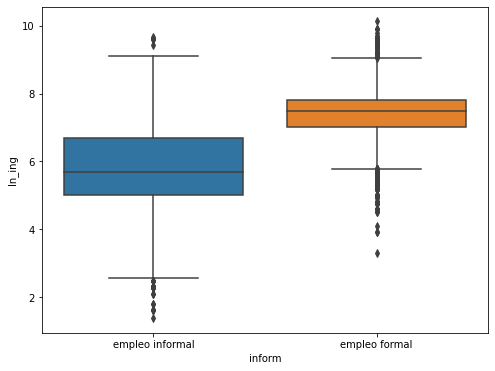

In [12]:
plt.figure(figsize=(8,6))

sns.boxplot(x="inform", y="ln_ing", data=dta)
plt.show()

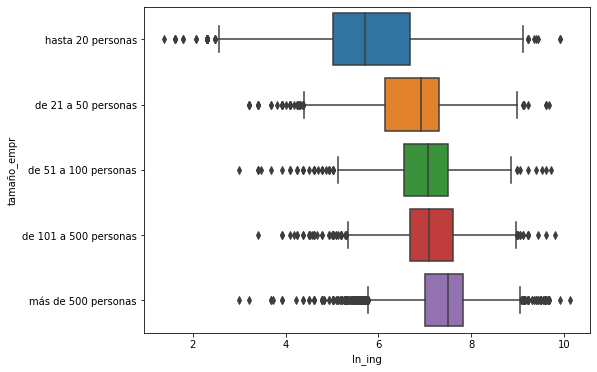

In [13]:
plt.figure(figsize=(8,6))

sns.boxplot(x="ln_ing", y="tamaño_empr", data=dta, orient="h")
plt.show()

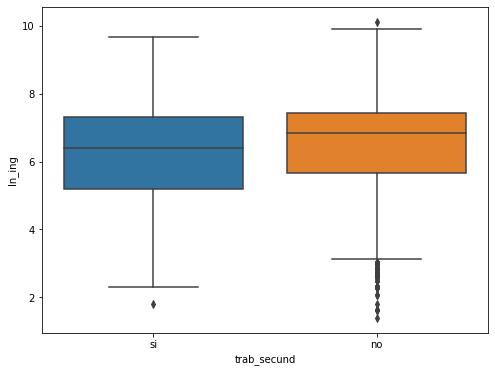

In [14]:
plt.figure(figsize=(8,6))

sns.boxplot(x="trab_secund", y="ln_ing", data=dta)
plt.show()

### Modelling I

3. Regresión múltiple preliminar



### Model Evaluation

4. Evaluación del modelo con la data de testeo (20%)

    4.1 R cuadrado
    
    4.2 Distribución de la testeo vs real


### Modeling II

5. Necesidad te una regresión polinómica? Linealizar las variables para seguir usando OLS